# Part1 : calculute mininimal v13

## save in folder min_v13_results

In [1]:
from Compute_PoissonRatio_v13 import get_v13
from MSRS import MSRS
import os

In [2]:
# create folder 'min_v13_results'
folder_name = "min_v13_results"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    print(f"Folder '{folder_name}' created.")
else:
    print(f"Folder '{folder_name}' already exists.")

Folder 'min_v13_results' already exists.


In [25]:
#  N = 2~20
# it takes several hours to compute all results if N = 20.
#  if N = 5, computing time would be far more less.
N = 5 
for num_layer in range(2,N+1):
    # sample_size increases as num_layer increases
    sample_size = max(100,num_layer*40)
    bounds = [[-90,90]]*num_layer

    res = MSRS(get_v13,bounds,sample_size,30000)
    res.find_global_min()
    res.save_results()

# Part2: clustering


## 2.1 feature selection

In [26]:
import pandas as pd
import numpy as np
import os
import datetime

In [28]:
# First select four features
# Set an epsilon tolerance
eps = 3

def if_sum_angles_zero(x):
    # Sum of all angles equals zero
    if abs(x.sum()) < eps:
        return 1
    else:
        return 0

def if_symmetric(x):
    # Equals the reversed data
    x = round(x)
    x = list(x)
    x_reverse = x[::-1]
    l = len(x)
    diff = [abs(x[i] - x_reverse[i]) for i in range(l)]
    
    if sum(diff)/l < eps:
        return 1
    else:
        return 0

def if_negative_symmetric(x):
    # Negating the entire sequence makes it equal to the reversed data
    x = round(x)
    x = list(x)
    x_reverse = x[::-1]
    l = len(x)
    diff = [abs(x[i] + x_reverse[i]) for i in range(l)]
    
    if sum(diff)/l < eps:
        return 1
    else:
        return 0

def if_abs_symmetric(x):
    # Absolute values of the sequence are equal to the reversed data
    x = [abs(i) for i in list(x)]
    x_reverse = x[::-1]
    l = len(x)
    diff = [abs(x[i] - x_reverse[i]) for i in range(l)]
    
    if sum(diff)/l < eps:
        return 1
    else:
        return 0

def num_different_abs_angles(x):
    x = [abs(i) for i in list(x)]
    if len(x) <= 20:
        x = [round(5*abs(i))/5 for i in x]
    else:
        x = [abs(i) for i in x]
        
    return len(set(x))


In [10]:
feature_names =  ["if_sum_angles_zero", "if_symmetric", "if_negative_symmetric", "if_abs_symmetric","num_different_abs_angles"]
def get_all_features(N, data):
    thetas = data[data.columns[1:-2]]
    PR  = data["poisson_rate"].mean()
    NUM_last_rows = 12
    features = np.zeros((NUM_last_rows,5))
    features = pd.DataFrame(features, columns = feature_names)
    for i in range(1,NUM_last_rows+1):
        x = thetas.iloc[-i,:]
        f = [if_sum_angles_zero(x), if_symmetric(x), if_negative_symmetric(x), if_abs_symmetric(x),num_different_abs_angles(x)]
        features.iloc[i-1,:] = f
    results = [N,PR] +list(features.mean())
    return results


In [44]:
filenames=os.listdir('min_v13_results')

all_res = []
for i in range(len(filenames)):
    file_name  = filenames[i]
    csv_path = 'min_v13_results/'+file_name
    N = int(file_name.split("_")[1])
    data = pd.read_csv(csv_path)
    data[data.columns[1:-2]] = data[data.columns[1:-2]]
    res = get_all_features(N, data)
    all_res.append(res)
    print(res)

res_df = pd.DataFrame(all_res)
res_df.columns = ["N","min_poission_rate"] + feature_names
res_df = res_df.sort_values(by='N', ascending=True)

[10, -0.33647822426098356, 1.0, 0.0, 1.0, 1.0, 5.083333333333333]
[11, -0.33505792977392745, 0.0, 0.4166666666666667, 0.0, 1.0, 2.0]
[12, -0.3367262596524599, 1.0, 0.25, 0.0, 1.0, 1.0]
[13, -0.33553345833528103, 0.0, 0.25, 0.0, 1.0, 2.0]
[14, -0.3366623086752567, 1.0, 0.0, 0.16666666666666666, 1.0, 5.5]
[15, -0.33583111512522146, 0.0, 0.08333333333333333, 0.0, 1.0, 2.0]
[16, -0.33672621332839847, 1.0, 0.16666666666666666, 0.0, 1.0, 1.0]
[17, -0.33602967951183166, 0.0, 0.08333333333333333, 0.0, 1.0, 2.0]
[18, -0.33670236432137024, 1.0, 0.0, 0.0, 1.0, 3.75]
[19, -0.33614524129789347, 0.0, 0.0, 0.0, 1.0, 2.1666666666666665]
[20, -0.3367260759245893, 1.0, 0.0, 0.0, 1.0, 1.4166666666666667]
[2, 0.05091963452329938, 1.0, 0.0, 1.0, 1.0, 1.0]
[3, -0.312811805108479, 0.0, 1.0, 0.0, 1.0, 2.0]
[4, -0.3367262858062808, 1.0, 1.0, 0.0, 1.0, 1.0]
[5, -0.3284938774958902, 0.0, 1.0, 0.0, 1.0, 2.0]
[6, -0.3346727571688489, 1.0, 0.0, 1.0, 1.0, 3.0]
[7, -0.33257608719707743, 0.0, 0.8333333333333334, 0.0, 

In [ ]:
res_df

In [45]:
# create folder 'feature_selection_results'
folder_name = "feature_selection_results"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    print(f"Folder '{folder_name}' created.")
else:
    print(f"Folder '{folder_name}' already exists.")

Folder 'feature_selection_results' already exists.


In [46]:
features_file_name = "feature_selection_results/feature_selection_"+str(datetime.date.today())+".csv"
res_df.to_csv(features_file_name, index = False)

## 2.2 Hierarchical Clustering

In [47]:
import numpy as np
import pandas as pd

In [48]:
data = pd.read_csv("feature_selection_results/feature_selection_2024-10-15.csv")
df_to_cluster = data.iloc[1:,:]
df_to_cluster

,N,min_poission_rate,if_sum_angles_zero,if_symmetric,if_negative_symmetric,if_abs_symmetric,num_different_abs_angles
1,3,-0.312812,0.0,1.000000,0.000000,1.000000,2.000000
2,4,-0.336726,1.0,1.000000,0.000000,1.000000,1.000000
3,5,-0.328494,0.0,1.000000,0.000000,1.000000,2.000000
4,6,-0.334673,1.0,0.000000,1.000000,1.000000,3.000000
5,7,-0.332576,0.0,0.833333,0.000000,0.833333,2.000000
6,8,-0.336726,1.0,0.833333,0.166667,1.000000,1.000000
7,9,-0.334228,0.0,0.583333,0.000000,0.916667,2.000000
8,10,-0.336478,1.0,0.000000,1.000000,1.000000,5.083333
9,11,-0.335058,0.0,0.416667,0.000000,1.000000,2.000000
10,12,-0.336726,1.0,0.250000,0.000000,1.000000,1.000000


In [49]:
# Min-max transform for min_poission_rate
df_to_cluster.loc[:, 'min_poission_rate'] = (df_to_cluster['min_poission_rate'] - df_to_cluster['min_poission_rate'].max()) / (df_to_cluster['min_poission_rate'].max() - df_to_cluster['min_poission_rate'].min())

# Z-score for num_different_abs_angles
df_to_cluster.loc[:, 'num_different_abs_angles'] = (df_to_cluster['num_different_abs_angles'] - df_to_cluster['num_different_abs_angles'].mean()) / df_to_cluster['num_different_abs_angles'].std()
df_to_cluster.loc[:, 'num_different_abs_angles'] = df_to_cluster['num_different_abs_angles'].round()


In [50]:
X = df_to_cluster[['min_poission_rate', 'if_sum_angles_zero', 'if_symmetric',
       'if_negative_symmetric', 'num_different_abs_angles']]

Best cut height: 1.7000000000000002, Silhouette score: 0.5885534968483033
Total number of clusters: 3
Cluster 1: [4, 8, 12, 16]
Cluster 2: [2, 6, 10, 14, 18]
Cluster 3: [1, 3, 5, 7, 9, 11, 13, 15, 17]


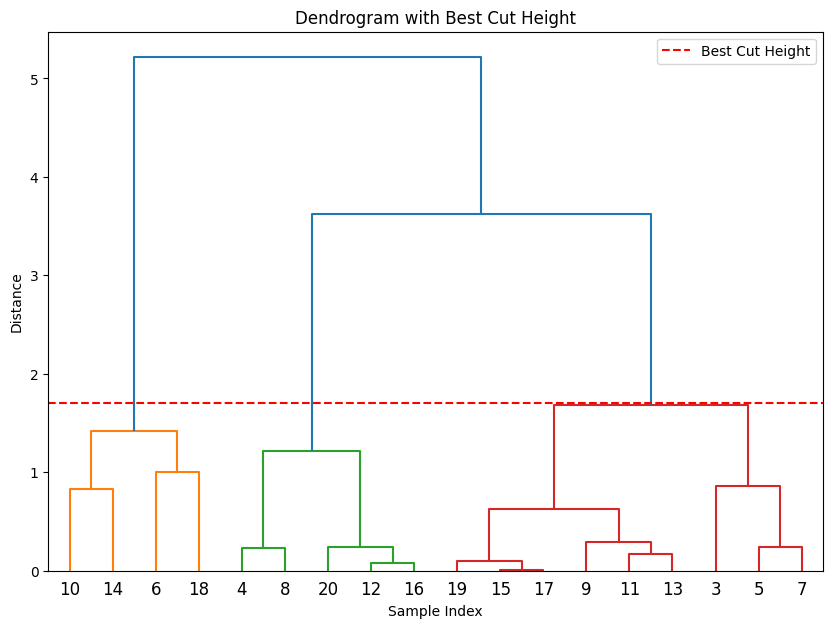

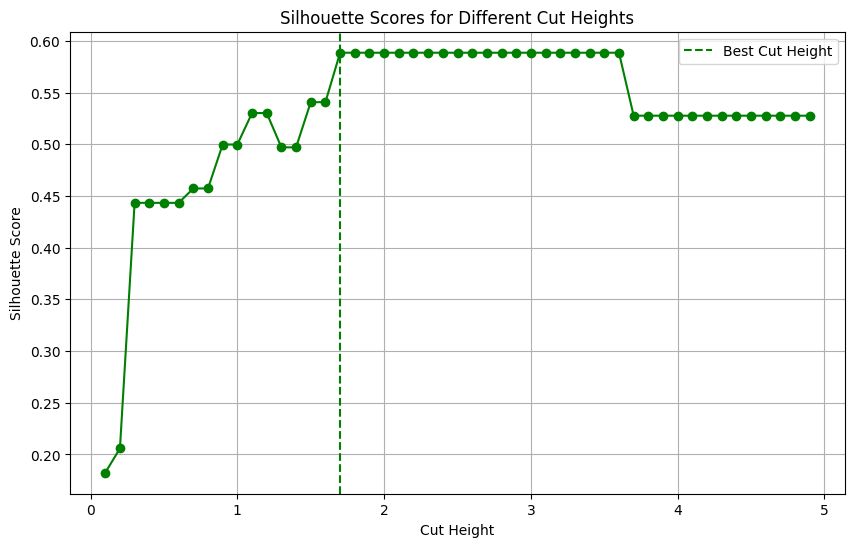

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

# Sample data
X = df_to_cluster[['min_poission_rate', 'if_sum_angles_zero', 
                   'if_symmetric', 'if_negative_symmetric', 
                   'num_different_abs_angles']]

# Hierarchical clustering
linked = linkage(X, 'ward')

# Calculate silhouette scores for different cut heights
heights = np.arange(0.1, 5, 0.1)
silhouette_scores = []
best_cut_height = None
max_silhouette = -1

for height in heights:
    clusters = fcluster(linked, height, criterion='distance')
    if len(set(clusters)) > 1:  # At least two clusters are needed to calculate the silhouette score
        silhouette_avg = silhouette_score(X, clusters)
        silhouette_scores.append(silhouette_avg)
        
        if silhouette_avg > max_silhouette:
            max_silhouette = silhouette_avg
            best_cut_height = height
    else:
        silhouette_scores.append(-1)  # Cannot calculate silhouette score

# Output the best cut height and silhouette score
print(f"Best cut height: {best_cut_height}, Silhouette score: {max_silhouette}")

# Determine clustering results based on the best cut height
if best_cut_height is not None:
    final_clusters = fcluster(linked, best_cut_height, criterion='distance')
    num_clusters = len(set(final_clusters))  # Number of clusters
    print(f"Total number of clusters: {num_clusters}")

    # Convert results to a DataFrame and print elements of each cluster
    cluster_dict = {i: [] for i in range(1, num_clusters + 1)}
    for idx, cluster_id in enumerate(final_clusters):
        cluster_dict[cluster_id].append(X.index[idx])

    for cluster_id, elements in cluster_dict.items():
        print(f"Cluster {cluster_id}: {elements}")

# Plot dendrogram
plt.figure(figsize=(10, 7))
custom_labels = [i+2 for i in range(1, len(X) + 1)]
dendrogram(linked,labels=custom_labels,  color_threshold=best_cut_height)
plt.axhline(y=best_cut_height, color='r', linestyle='--', label='Best Cut Height')
plt.title('Dendrogram with Best Cut Height')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.legend()
plt.show()

# Plot silhouette score chart
plt.figure(figsize=(10, 6))
plt.plot(heights, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Scores for Different Cut Heights')
plt.xlabel('Cut Height')
plt.ylabel('Silhouette Score')
plt.grid()
plt.axvline(x=best_cut_height, color='green', linestyle='--', label='Best Cut Height')
plt.legend()
plt.show()


In [54]:
n_clusters = 3  
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
cluster_pred = agg_clustering.fit_predict(X)

# print clustering results
for i in range(len(cluster_pred)):
    if data.iloc[i+1,0] % 4 == 0:
        print("N: "+str(data.iloc[i+1,0]) +" cluster:" + str(cluster_pred[i]))

print()
for i in range(len(cluster_pred)):
    if data.iloc[i+1,0] % 4 == 2:
        print("N: "+str(data.iloc[i+1,0]) +" cluster:" + str(cluster_pred[i]))

print()
for i in range(len(cluster_pred)):
    if data.iloc[i+1,0] % 2 == 1:
        print("N: "+str(data.iloc[i+1,0]) +" cluster:" + str(cluster_pred[i]))

N: 4 cluster:2
N: 8 cluster:2
N: 12 cluster:2
N: 16 cluster:2
N: 20 cluster:2

N: 6 cluster:1
N: 10 cluster:1
N: 14 cluster:1
N: 18 cluster:1

N: 3 cluster:0
N: 5 cluster:0
N: 7 cluster:0
N: 9 cluster:0
N: 11 cluster:0
N: 13 cluster:0
N: 15 cluster:0
N: 17 cluster:0
N: 19 cluster:0


# Part3: High-dimension optimization

In [1]:
from MSRS_HighDim import MSRS
from Compute_PoissonRatio_v13_HighDim import *

In [3]:
def get_v13_4k(theta,N):
    Layer_4 = [theta,-theta,-theta,theta]
    angles = Layer_4*(N//4)
    J = get_J(angles)
    return  -J[2,0]/J[0,0]

def get_v13_4k2(thetas, N):
    thetas = list(thetas)
    thetas_2 = [- thetas[len(thetas) - i - 1] for i in range(len(thetas))]
    angles =  thetas + thetas_2
    J = get_J(angles)
    return  -J[2,0]/J[0,0]

def get_v13_2k1(thetas, N):
    theta1 = max(abs(thetas[0]), abs(thetas[1])) 
    theta2 = - min(abs(thetas[0]), abs(thetas[1])) 
    if N % 4 == 1:
        k = (N-1)//4
        angles = [theta2]*k + [theta1]*k + [theta2] + [theta1]*k + [theta2]*k
    if N % 4 == 3:
        k = (N-3)//4
        angles = [theta2]*(k+1) + [theta1]*k + [theta1] + [theta1]*k + [theta2]*(k+1)
    J = get_J(angles)
    return  -J[2,0]/J[0,0]


0.29689884185791016


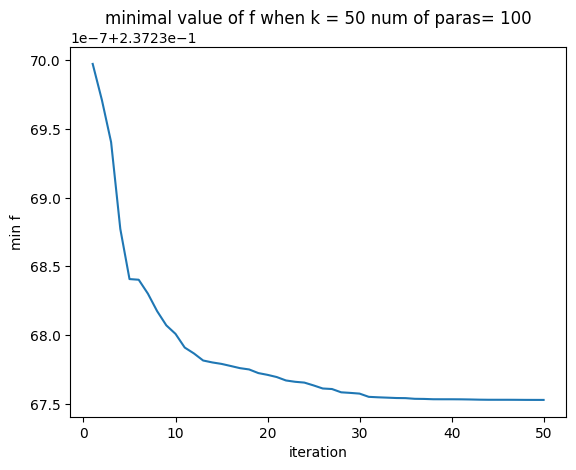

[array([-14.35767118]), array([-14.35730768]), array([-14.34868027]), array([-14.35665119]), array([-14.34914561]), array([-14.35577713]), array([14.35006099]), array([14.35515812]), array([-14.35511213]), array([-14.35057035]), array([14.35066753]), array([14.35475516]), array([14.35431772]), array([14.351636]), array([-14.35402727]), array([14.35402056]), array([14.35389628]), array([-14.35206123]), array([-14.35348903]), array([14.35228922])]
[0.2372367550227585, 0.2372367546939385, 0.23723675443499675, 0.23723675416521525, 0.23723675407943032, 0.23723675359137178, 0.23723675350297913, 0.2372367532748665, 0.23723675325432758, 0.23723675325283455, 0.23723675321084423, 0.23723675310888825, 0.2372367529644661, 0.2372367528927971, 0.23723675288913798, 0.23723675288759022, 0.23723675286053406, 0.23723675281081283, 0.23723675279293358, 0.23723675278134598]
total time :0.3


In [4]:
num_layer =  100

bounds = [[-90,90]]*1
res = MSRS(get_v13,bounds,num_layer,50,10000)
res.find_global_min()
res.save_results()
print(res.total_time )
res.plot_res()


4.546510219573975


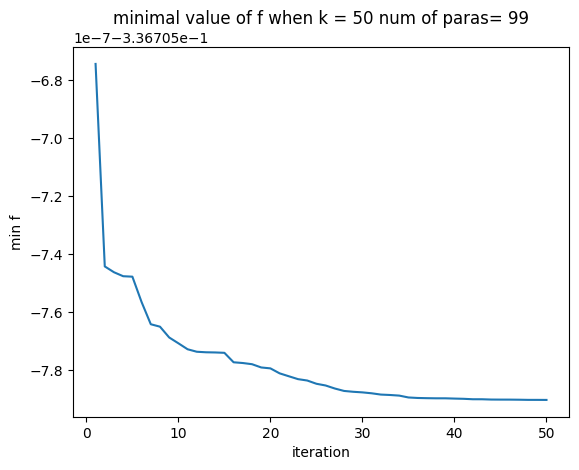

[array([-24.69936056,  24.36076911]), array([-24.35769014, -24.70284571]), array([ 24.70285498, -24.35781392]), array([24.69985202, 24.36069966]), array([-24.70189865, -24.35810819]), array([ 24.7002304 , -24.35980786]), array([24.35844544, 24.70226023]), array([-24.70105633,  24.36031535]), array([-24.35997105, -24.70033736]), array([-24.70225715,  24.35879021]), array([ 24.70124045, -24.35867297]), array([-24.35888413,  24.70116213]), array([24.70069402, 24.35976062]), array([-24.70096792,  24.35981076]), array([ 24.35974049, -24.70132669]), array([-24.35970642, -24.70137413]), array([-24.70100578,  24.35965993]), array([24.70151768, 24.35915926]), array([-24.35941645,  24.70145484]), array([-24.70128545,  24.35945669])]
[-0.3367057879629161, -0.33670578840558907, -0.3367057885505013, -0.3367057887604465, -0.3367057894053402, -0.33670578957755976, -0.33670578964955555, -0.33670578969482323, -0.3367057896951331, -0.3367057897879158, -0.33670578986751637, -0.33670579001857204, -0.33670

In [5]:
num_layer =  99
bounds = [[-90,90]]*2

res = MSRS(get_v13_2k1,bounds,num_layer,50,10000)
res.find_global_min()
res.save_results()
print(res.total_time )
res.plot_res()

151.95558905601501


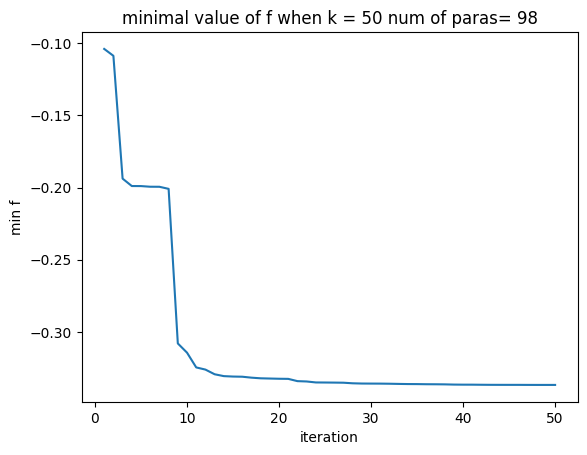

[array([ 26.57669357, -22.5855254 ,  26.48690668,  26.47141195,
       -22.66605208, -22.78042964, -22.75317453,  26.29125612,
       -22.91058405, -22.86722805,  26.06946903, -22.96456045,
       -23.04429984,  26.04032414, -23.07954515,  25.9400115 ,
        25.92498044,  25.85574015, -23.26859633, -23.28765116,
       -23.35773754,  25.67271913, -23.42427421,  25.58247021,
       -23.48588282,  25.52402881,  25.48681355,  25.4406939 ,
       -23.66210422,  25.30720286, -23.76995441, -23.8065498 ,
       -23.82465707, -23.87147433, -23.93230331,  25.104276  ,
        25.04938395,  25.01430026,  24.98258394, -24.1202316 ,
       -24.18280081, -24.2247553 , -24.30277798, -24.30269928,
        24.71974562,  24.73537403,  24.6259434 ,  24.57927   ,
        24.56557689]), array([-22.64722347,  26.43954465,  26.39063999, -22.76335112,
       -22.80383804,  26.27793836, -22.88174335, -22.91596249,
       -22.95404228,  26.11098359, -23.03182857, -23.07058216,
        25.99353803, -23.122093

In [6]:
num_layer =  98
bounds = [[-90,90]]*49

res = MSRS(get_v13_4k2,bounds,num_layer,50,10000)
res.find_global_min()
res.save_results()
print(res.total_time )
res.plot_res()
